In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import run_detector as main 
import cpu_detection as detector

In [3]:
# load data
data_dir = 'ub_calls'          # this is the path to your audio files
do_time_expansion = True       # if audio is already time expanded set this to False

# read audio files
audio_files = main.get_audio_files(data_dir)

In [4]:
# load and create the detector    
det_model_file = 'models/detector.npy'
# The parameters are in models/detector_params.json
det_params_file = det_model_file[:-4] + '_params.json'
# Method CPUDetector is in cpu_detection.py
det = detector.CPUDetector(det_model_file, det_params_file)

In [9]:
file_num = 3
print("There are " + str(len(audio_files)) + " files")
file_name = audio_files[file_num-1]
file_name_basename = file_name[len(data_dir):]
print(audio_files)
print("Filename: ", file_name)

There are 19 files
['ub_calls/20210910_030000HFnLF_2sec_playable.wav', 'ub_calls/20210921_030000_HFonly_8s.wav', 'ub_calls/20210909_03_carppond_1245_1sec2.wav', 'ub_calls/20210921_03000045test2.wav', 'ub_calls/20210921_03000045test3.wav', 'ub_calls/20210921_030000test.wav', 'ub_calls/20210909_03_carppond_1230_1sec.wav', 'ub_calls/20210921_03000045test4.wav', 'ub_calls/20210910_070000_bat_party.wav', 'ub_calls/20210909_03_carppond_1230to1302(PRC).wav', 'ub_calls/20210910_030000HFnLF_2sec.wav', 'ub_calls/20210910_070000_bat_party_playable.wav', 'ub_calls/20210909_03_carppond_1245_1sec2_playable.wav', 'ub_calls/20210910_030000HFnLF_2sec_2.wav', 'ub_calls/20210921_03000045test5.wav', 'ub_calls/20210921_030000_HFnLF_5s.wav', 'ub_calls/test_file.wav', 'ub_calls/20210910_030000HFnLF_2sec_2_playable.wav', 'ub_calls/20210909_03_carppond_1245_1sec.wav']
('Filename: ', 'ub_calls/20210909_03_carppond_1245_1sec2.wav')


In [10]:
# read audio file - skip file if can't read it
read_fail, audio, file_dur, samp_rate, samp_rate_orig = main.read_audio(file_name,
                        do_time_expansion, det.chunk_size, det.win_size)

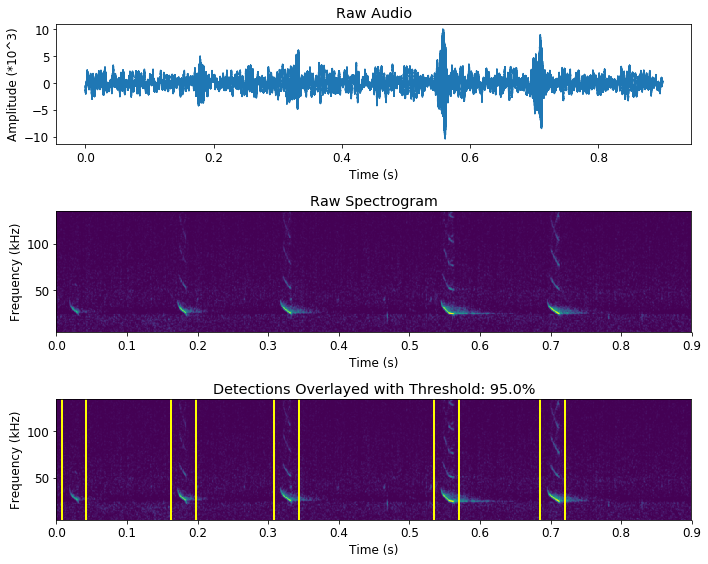

  5 calls found


In [15]:
detection_thresh = 0.95
    
det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                detection_thresh, do_time_expansion)

# Calling our method here to plot a figure for each file in the directory
main.plot_calls(audio[:int(0.9*samp_rate_orig)], samp_rate_orig, det, det_time, detection_thresh)

num_calls = len(det_time)
print('  ' + str(num_calls) + ' calls found')

In [ ]:
print("There are " + str(len(audio_files)) + " files")
for file_num in range(len(audio_files)):
    file_name = audio_files[file_num-1]
    file_name_basename = file_name[len(data_dir):]

    # read audio file - skip file if can't read it
    read_fail, audio, file_dur, samp_rate, samp_rate_orig = main.read_audio(file_name,
                            do_time_expansion, det.chunk_size, det.win_size)

    detection_thresh = 0.80

    det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                    detection_thresh, do_time_expansion)

    # Calling our method here to plot a figure for each file in the directory
    main.plot_calls(audio, samp_rate_orig, det, det_time)

    num_calls = len(det_time)
    print('  ' + str(num_calls) + ' calls found')